## TALLER -- inyecta la predicción como último elemento para una nueva entrada, generando así una señal nueva

In [3]:
import pandas, numpy, time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, LSTM
from tensorflow.keras.backend import clear_session

In [26]:
# convert an array of values into a sliding window dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

def get_predictions(model, scaler, kX, y=None):
    """
    y: not used in prediction, only to get the transformation back
    """
    s_preds = model.predict(kX)
    if scaler is not None:
        s_preds = scaler.inverse_transform(s_preds)
        
    if y is not None:
        s_y     = scaler.inverse_transform(y) if scaler is not None else y
        return s_y[0], s_preds[:,0]
    else:
        return s_preds

def get_RMSE(model, scaler, kX, y):

    sy,spreds = get_predictions(model, scaler, kX, y)
    return np.sqrt(np.mean((sy-spreds)**2))

def plot_predictions(dataset, ktrainX, trainY, ktestX, testY, model, scaler, look_back):
    sy_train, spreds_train = get_predictions(model, scaler, ktrainX, [trainY])
    sy_test,  spreds_test  = get_predictions(model, scaler, ktestX, [testY])
    
    plt.figure(figsize=(20,5))
    plt.plot(range(look_back, look_back+len(spreds_train)), spreds_train,
            label="predictions train", color="blue", lw=2)
    plt.plot(range(look_back, look_back+len(spreds_train)), sy_train,
            label="target train", color="blue", lw=2, alpha=.3)

    plt.plot(range(look_back+len(spreds_train), look_back+len(spreds_train)+len(spreds_test)), 
             spreds_test, label="predictions test", color="red", lw=2)
    plt.plot(range(look_back+len(spreds_train), look_back+len(spreds_train)+len(spreds_test)), 
             sy_test,         
             label="target test", color="red", lw=2, alpha=.3)
    
    plt.plot(scaler.inverse_transform(dataset), color="black", label="data", lw=3, alpha=.2)
    plt.legend(loc=2)
    plt.xlim(0,len(dataset))
    plt.xticks(range(0,len(dataset),2));
    plt.grid()

    
def get_model(lstm_size, input_shape):
    clear_session()
    model = Sequential()
    lstm = LSTM(units=lstm_size, input_shape=input_shape, recurrent_activation="sigmoid")
    dense = Dense(1)
    model.add(lstm)
    model.add(dense)
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
    

(144, 1)

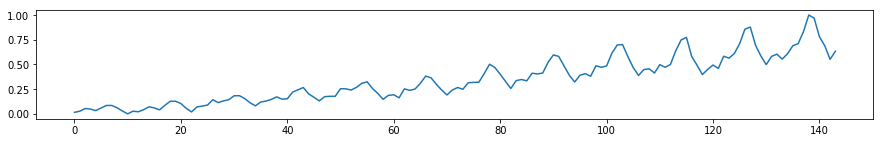

In [32]:
dataset = pd.read_csv('data/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataset.values
dataset = dataset.astype('float32')
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
plt.figure(figsize=(15,2))
plt.plot(dataset)
dataset.shape

In [37]:
look_back = 20

train_size  = int(len(dataset) * 0.67)
test_size   = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size-look_back:len(dataset),:]
print train.shape, test.shape

trainX, trainY = create_dataset(train, look_back)
testX, testY   = create_dataset(test, look_back)
ktrainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1],1))
ktestX  = numpy.reshape(testX, (testX.shape[0], testX.shape[1],1))
print trainX.shape, testX.shape
print ktrainX.shape, ktestX.shape

(96, 1) (68, 1)
(76, 20) (48, 20)
(76, 20, 1) (48, 20, 1)


In [38]:
model = get_model(50, input_shape=ktestX.shape[1:])
mhist = model.fit(ktrainX, trainY, epochs=200, batch_size=10, verbose=1)

Epoch 1/200
76/76 [==============================] - 1s 15ms/step - loss: 0.0434
Epoch 2/200
76/76 [==============================] - 0s 3ms/step - loss: 0.0079
Epoch 3/200
76/76 [==============================] - 0s 3ms/step - loss: 0.0096
Epoch 4/200
76/76 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 5/200
76/76 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 6/200
76/76 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 7/200
76/76 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 8/200
76/76 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 9/200
76/76 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 10/200
76/76 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 11/200
76/76 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 12/200
76/76 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 13/200
76/76 [================

76/76 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 103/200
76/76 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 104/200
76/76 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 105/200
76/76 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 106/200
76/76 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 107/200
76/76 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 108/200
76/76 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 109/200
76/76 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 110/200
76/76 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 111/200
76/76 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 112/200
76/76 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 113/200
76/76 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 114/200
76/76 [=========

In [84]:
x = ktestX[0]
x = x[np.newaxis,:]

preds = []
for i in range(len(testY)):
    p = get_predictions(model,None,x)[0]
    
    # --- TU CODIGO AQUI ----
    # MODIFICA  x PARA ELIMINAR SU PRIMER ELEMENTO 
    # E INCLUIR AL FINAL LA PREDICCION ANTERIOR
    # -----------------------
    # INSPECCIONA LOS TAMANOS DE LAS ESTRUCTURAS PARA 
    # DETERMINAR COMO Y DONDE AÑADIR LA PREDICCION
    # -----------------------
    x = np.append(np.delete(x,0), p)
    x = np.reshape(np.array([x]), (1,x.shape[0], 1))
    preds.append(p[0])

preds = np.r_[preds]

In [85]:
x = ktestX[0]
x = x[np.newaxis,:]

p = get_predictions(model,None,x)[0]
print x, p
print [x[0,1], 20]


[[[0.32046333]
  [0.4073359 ]
  [0.5019305 ]
  [0.46911195]
  [0.40154442]
  [0.32818535]
  [0.25675675]
  [0.3359073 ]
  [0.34749034]
  [0.33397684]
  [0.41119692]
  [0.4034749 ]
  [0.4131274 ]
  [0.52123547]
  [0.5965251 ]
  [0.58108103]
  [0.484556  ]
  [0.3899614 ]
  [0.3223938 ]
  [0.3899614 ]]] [0.36694056]
[array([0.4073359], dtype=float32), 20]


In [86]:
sy, spreds = get_predictions(model, scaler, ktrainX, [trainY])

debería de resultar en algo similar a lo siguiente

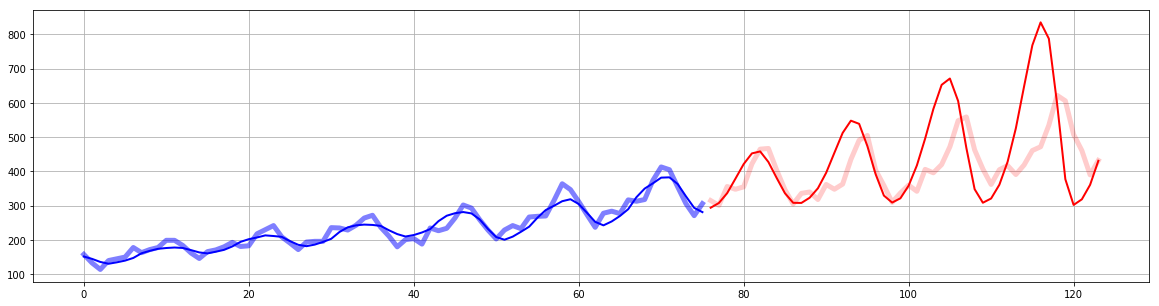

In [87]:
plt.figure(figsize=(20,5))
plt.plot(range(len(sy),len(sy)+len(testY)), scaler.inverse_transform(testY.reshape(-1,1))[:,0], lw=5, alpha=.2, color="red")
plt.plot(range(len(sy),len(sy)+len(testY)), scaler.inverse_transform(preds.reshape(-1,1))[:,0], lw=2, color="red")
plt.plot(sy, lw=5, alpha=.5, color="blue")
plt.plot(spreds, lw=2, color="blue")
plt.grid()